# Fibonacci Numbers  
피보나치 수는 재귀적 방식, DP 방식으로 해결하는 것이 가장 잘 알려져있다.  
이거보다 빠른 방법이 있는데, 아래와 같다고 한다.

1. 행렬 연산을 이용한 방법 $O(\log{n})$  
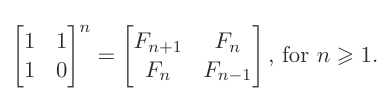

2. 일반항을 이용하는 방법
$Fib_n = {{({{1+\sqrt{5}}\over{2}})^n - ({{1-\sqrt{5}}\over{2}})^n}\over{\sqrt{5}}} $
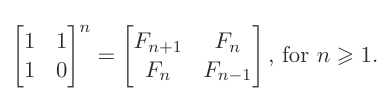
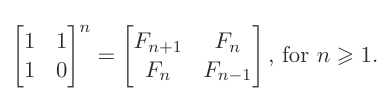

# <span style="color:Salmon">FibFrog</span>

<div class="brinza-task-description">
<p>The Fibonacci sequence is defined using the following recursive formula:</p>
<tt style="white-space: pre-wrap;">    F(0) = 0
    F(1) = 1
    F(M) = F(M - 1) + F(M - 2) if M &gt;= 2</tt>
<p>A small frog wants to get to the other side of a river. The frog is initially located at one bank of the river (position −1) and wants to get to the other bank (position N). The frog can jump over any distance F(K), where F(K) is the K-th Fibonacci number. Luckily, there are many leaves on the river, and the frog can jump between the leaves, but only in the direction of the bank at position N.</p>
<p>The leaves on the river are represented in an array A consisting of N integers. Consecutive elements of array A represent consecutive positions from 0 to N − 1 on the river. Array A contains only 0s and/or 1s:</p>
<blockquote><ul style="margin: 10px; padding: 0px;"><li>0 represents a position without a leaf;</li>
<li>1 represents a position containing a leaf.</li>
</ul>
</blockquote><p>The goal is to count the minimum number of jumps in which the frog can get to the other side of the river (from position −1 to position N). The frog can jump between positions −1 and N (the banks of the river) and every position containing a leaf.</p>
<p>For example, consider array A such that:</p>
<tt style="white-space: pre-wrap;">    A[0] = 0
    A[1] = 0
    A[2] = 0
    A[3] = 1
    A[4] = 1
    A[5] = 0
    A[6] = 1
    A[7] = 0
    A[8] = 0
    A[9] = 0
    A[10] = 0</tt>
<p>The frog can make three jumps of length F(5) = 5, F(3) = 2 and F(5) = 5.</p>
<p>Write a function:</p>
<blockquote><p style="font-family: monospace; font-size: 9pt; display: block; white-space: pre-wrap;"><tt>def solution(A)</tt></p></blockquote>
<p>that, given an array A consisting of N integers, returns the minimum number of jumps by which the frog can get to the other side of the river. If the frog cannot reach the other side of the river, the function should return −1.</p>
<p>For example, given:</p>
<tt style="white-space: pre-wrap;">    A[0] = 0
    A[1] = 0
    A[2] = 0
    A[3] = 1
    A[4] = 1
    A[5] = 0
    A[6] = 1
    A[7] = 0
    A[8] = 0
    A[9] = 0
    A[10] = 0</tt>
<p>the function should return 3, as explained above.</p>
<p>Write an <b><b>efficient</b></b> algorithm for the following assumptions:</p>
<blockquote><ul style="margin: 10px; padding: 0px;"><li>N is an integer within the range [<span class="number">0</span>..<span class="number">100,000</span>];</li>
<li>each element of array A is an integer that can have one of the following values: 0, 1.</li>
</ul>
</blockquote></div>

In [36]:
# 이거 피보나치 수는 10만까지 가봤자 몇 개 안됨 (25개?)
# 그럼 매 leaf마다 피보나치 수로 역주행해가며 어디선가 닿을 수 있었으면 1, 아니면 0으로 갱신해버리면 됨 (여기까지 올 수 있었느냐?)

def solution(n):
    fib = [1, 2]
    for _ in range(22):
        fib.append(fib[-1]+fib[-2])

    possible = [0 for _ in range(len(n)+1)]
    
    for idx, val in enumerate(n+[1]):
        if not val:
            continue
        for f in fib:
            idxf = idx-f
            if idxf < -1:
                break
            if idxf == -1:
                possible[idx] = 1
                break
            if not possible[idxf]:
                continue
            if not possible[idx]:
                possible[idx] = possible[idxf]+1
            else:
                possible[idx] = min(possible[idx], possible[idxf]+1)

    return possible[-1] if possible[-1] else -1
    
solution([0,0,0,1,1,0,1,0,0,0,0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 3]


3

# <span style="color:Salmon">Ladder</span>

<div class="brinza-task-description">
<p>You have to climb up a ladder. The ladder has exactly N rungs, numbered from 1 to N. With each step, you can ascend by one or two rungs. More precisely:</p>
<blockquote><ul style="margin: 10px; padding: 0px;"><li>with your first step you can stand on rung 1 or 2,</li>
<li>if you are on rung K, you can move to rungs K + 1 or K + 2,</li>
<li>finally you have to stand on rung N.</li>
</ul>
</blockquote><p>Your task is to count the number of different ways of climbing to the top of the ladder.</p>
<p>For example, given N = 4, you have five different ways of climbing, ascending by:</p>
<blockquote><ul style="margin: 10px; padding: 0px;"><li>1, 1, 1 and 1 rung,</li>
<li>1, 1 and 2 rungs,</li>
<li>1, 2 and 1 rung,</li>
<li>2, 1 and 1 rungs, and</li>
<li>2 and 2 rungs.</li>
</ul>
</blockquote><p>Given N = 5, you have eight different ways of climbing, ascending by:</p>
<blockquote><ul style="margin: 10px; padding: 0px;"><li>1, 1, 1, 1 and 1 rung,</li>
<li>1, 1, 1 and 2 rungs,</li>
<li>1, 1, 2 and 1 rung,</li>
<li>1, 2, 1 and 1 rung,</li>
<li>1, 2 and 2 rungs,</li>
<li>2, 1, 1 and 1 rungs,</li>
<li>2, 1 and 2 rungs, and</li>
<li>2, 2 and 1 rung.</li>
</ul>
</blockquote><p>The number of different ways can be very large, so it is sufficient to return the result modulo 2<sup>P</sup>, for a given integer P.</p>
<p>Write a function:</p>
<blockquote><p style="font-family: monospace; font-size: 9pt; display: block; white-space: pre-wrap;"><tt>def solution(A, B)</tt></p></blockquote>
<p>that, given two non-empty arrays A and B of L integers, returns an array consisting of L integers specifying the consecutive answers; position I should contain the number of different ways of climbing the ladder with A[I] rungs modulo 2<sup>B[I]</sup>.</p>
<p>For example, given L = 5 and:</p>
<tt style="white-space: pre-wrap;">    A[0] = 4   B[0] = 3
    A[1] = 4   B[1] = 2
    A[2] = 5   B[2] = 4
    A[3] = 5   B[3] = 3
    A[4] = 1   B[4] = 1</tt>
<p>the function should return the sequence [5, 1, 8, 0, 1], as explained above.</p>
<p>Write an <b><b>efficient</b></b> algorithm for the following assumptions:</p>
<blockquote><ul style="margin: 10px; padding: 0px;"><li>L is an integer within the range [<span class="number">1</span>..<span class="number">50,000</span>];</li>
<li>each element of array A is an integer within the range [<span class="number">1</span>..<span class="number">L</span>];</li>
<li>each element of array B is an integer within the range [<span class="number">1</span>..<span class="number">30</span>].</li>
</ul>
</blockquote></div>

In [57]:
# 문제 자체가 피보나치 수열의 정의다.
# n번째 스텝에 오르는 방법은 n-2번쨰 스텝에서 한번에 오는방법 또는 n-1번쨰 스텝에서 한번에 오는 방법밖에 없다.

def solution(A, B):
    fib = [0,1,2] + [0 for _ in range(len(A)-2)]
    for i in range(3, len(A)+1):
        fib[i] = (fib[i-1]+fib[i-2])%(2**30)

    answer = []
    for a, b in zip(A, B):
        answer.append(fib[a]%(2**b))
    return answer

solution([4,4,5,5,1], [3,2,4,3,1])

[5, 1, 8, 0, 1]